<a href="https://colab.research.google.com/github/hamagami/anomaly-detection/blob/main/04_05_oneclassSVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# one class SVM による時系列異常検知

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
DIR="drive/My Drive/Colab Notebooks/異常検知サンプルコード/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 必要なモジュールのimport

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM

### セグメントの切り出し関数

In [ ]:
def segdata(lst, dim):
    emb = np.empty((0,dim), float)
    for i in range(lst.size - dim + 1):
        tmp = np.array(lst[i:i+dim])[::-1].reshape((1,-1)) #セグメントの切り出し，時系列反転，appendのための2次ベクトル化
        emb = np.append( emb, tmp, axis=0)
    return emb

### データ読み込み，パラメータ設定
 Keoghらの心電図のデータ  http://www.cs.ucr.edu/~eamonn/discords/qtdbsel102.txt
 Keogh, E., Lin, J. and Fu, A.: HOT SAX : Efficiently Finding the Most Unusual Time Series Subsequence, in Proceedings of the Fifth IEEE International Conference on Data Mining, ICDM 05, pp.226-233.

In [ ]:
LEN=3000  #分析区間
WLEN=150 #セグメントのサイズ
SP=0         #学習用データの開始点
AP=3000   #テスト用データの開始点　個のデータの場合 4250ポイント付近に異常がある

In [ ]:
data = np.loadtxt(DIR+"04/data/qtdbsel102.txt",delimiter="\t")
print("データ数:",data.shape[0],"  次元数:",data.shape[1])

#元データは3次元の時系列，3次のデータ(indexとしては2)を指定して学習/テストデータに分割
train_org = data[SP:SP+LEN*10, 2]      #学習用データとして 1～2999サンプル区間を使用

データ数: 45000   次元数: 3


### 窓関数の設定と切り出し

In [ ]:
seglen = WLEN   #Window size
#winlenの単位で1ポイントずつずらした2次元表現に変換
train = segdata(train_org, seglen)
test_org  = data[AP:AP+LEN, 2]  #テスト用データとして3000～5999サンプルを使用
test =  segdata(test_org, seglen)


### one class SVMによる判定

In [ ]:
clf = OneClassSVM(nu=0.001, kernel='rbf', gamma='auto')
clf.fit(train)
pred = clf.predict(test)

### 波形と OCSVMの判定結果を並べて表示

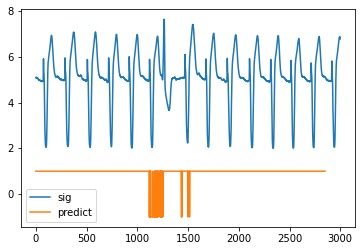

In [ ]:
plt.plot(test_org, label="sig")
plt.plot(pred, label="predict")
plt.legend()
plt.show()